## **Project Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## **Project Objective**

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## **Data Understanding**

Financal Inclusion Survey Data

The main dataset contains demographic information and what financial services are used by approximately 33,610 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

1. FinAccess Kenya 2018

2. Finscope Rwanda 2016

3. Finscope Tanzania 2017

4. Finscope Uganda 2018

The data have been split between training and test sets. The test set contains all information about each individual except for whether the respondent has a bank account or not.

Your goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

In [1]:
### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### import datasets
train=pd.read_csv('/content/Train_v2.csv')

In [3]:
### glimpse the train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
##  the shape of the data
train.shape

(23524, 13)

In [6]:
### the data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


One cannot notice that our data is perfect and have no null values 

## Data Cleaning and manipulation

In [7]:
### checking for duplicates
train.duplicated().any()

False

In [8]:
### checking for missing values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

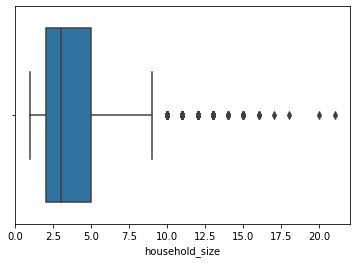

In [9]:
### check for outliers
sns.boxplot(x='household_size',data=train)

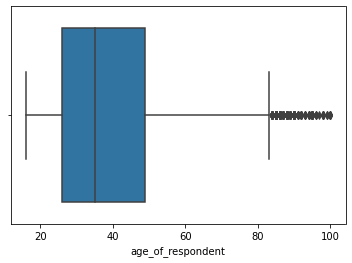

In [10]:
sns.boxplot(x='age_of_respondent',data=train)

In [11]:
#### checking the outliers
Q1=train.quantile(q=0.25)
Q3=train.quantile(q=0.75)
IQR=Q3-Q1
print(IQR)

year                  2.0
household_size        3.0
age_of_respondent    23.0
dtype: float64


In [12]:
### removing outliers
train=train[~((train < (Q1-1.5*IQR))|(train > (Q3+1.5 *IQR))).any(axis=1)]
train.shape

(22902, 13)

In [13]:
#### checking for anormalies
for col in train.select_dtypes([np.object]):
  print(train[col].unique())
  print('---------------------------------------------------------------------')

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
---------------------------------------------------------------------
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_6403'
 'uniqueid_6450' 'uniqueid_6515']
---------------------------------------------------------------------
['Yes' 'No']
---------------------------------------------------------------------
['Rural' 'Urban']
---------------------------------------------------------------------
['Yes' 'No']
---------------------------------------------------------------------
['Female' 'Male']
---------------------------------------------------------------------
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
---------------------------------------------------------------------
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
---------------------------------------------------------------------
['Secondary education' 'No formal education'
 'Vocational/Spec

The categorical data is well inputed. Since its survey data we expected misspelling and other anomalies

## **Exploratory Data Analysis**

In [14]:
## have a data statistical description
for col in train.select_dtypes([np.int64]):
  print(train[col].describe())

count    22902.000000
mean      2016.966684
std          0.844630
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: year, dtype: float64
count    22902.000000
mean         3.689066
std          2.025134
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64
count    22902.000000
mean        38.348441
std         15.804692
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: age_of_respondent, dtype: float64


The mean household size is 4 people in house, The household with the highest had 9 members and the least had 1.

The mean age of respondents is 38 years and the youngest person in the survey was 16 years and the eldest was 83.

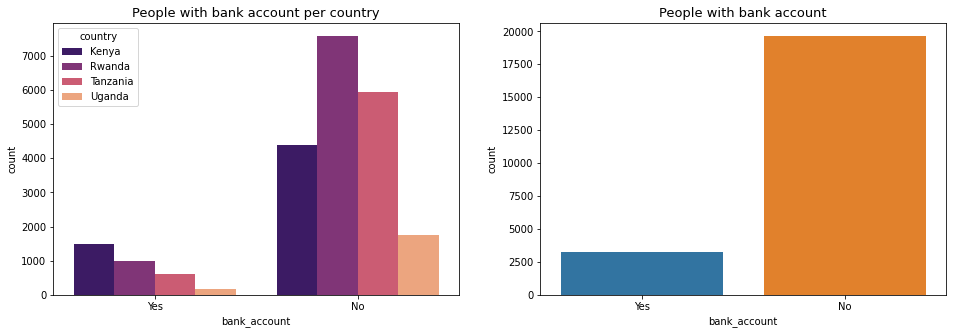

In [15]:
## number of people with bank account per country
f,axes=plt.subplots(1,2,figsize=(16,5))
sns.countplot(x='bank_account',hue='country',data=train,palette='magma',ax=axes[0]).set_title('People with bank account per country',fontsize=(13))
sns.countplot(x='bank_account',data=train,ax=axes[1]).set_title('People with bank account',fontsize=(13))
plt.show()

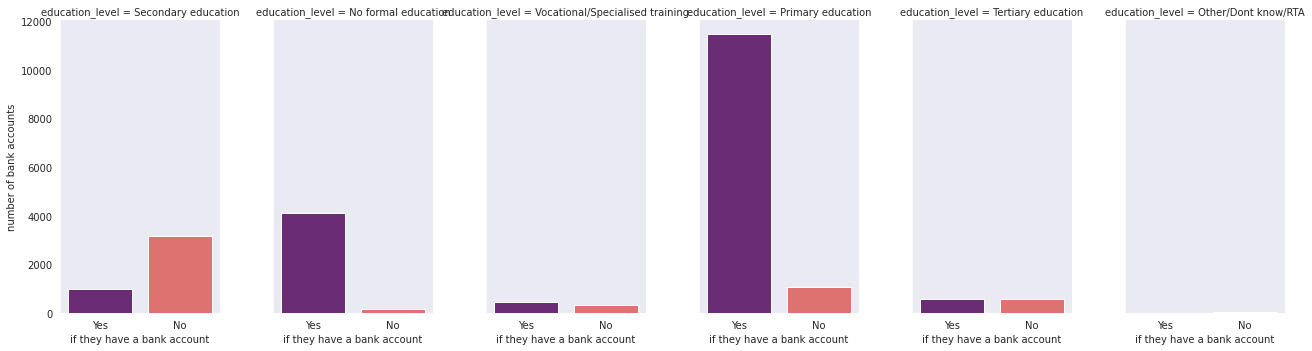

In [16]:
####The number of people with bank accounts
sns.set_style("dark") 
g=sns.FacetGrid(train,col='education_level',height=5,margin_titles=True,aspect=0.6,)
g.map(sns.countplot,'bank_account',palette='magma')
g.set_axis_labels("if they have a bank account", "number of bank accounts")


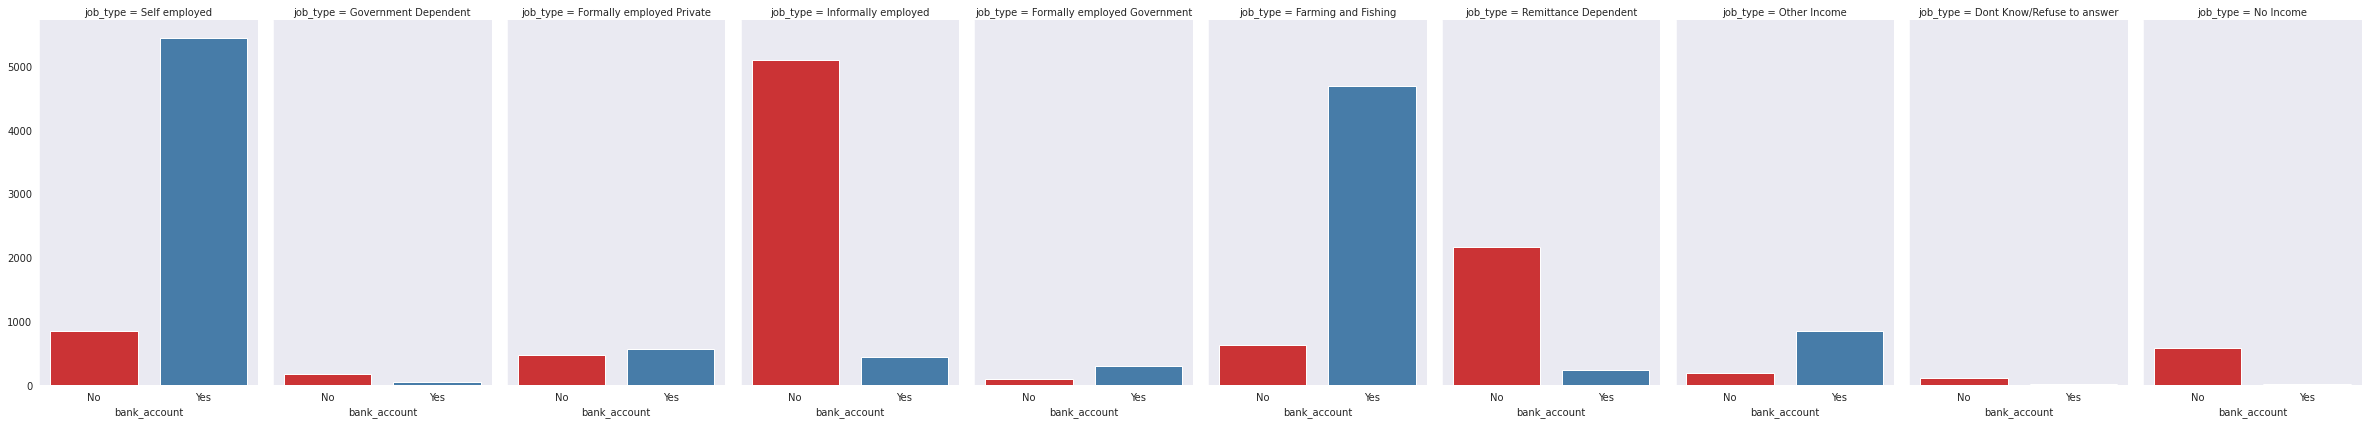

In [17]:
### bank account  by job type
sns.set_style("dark")
y=sns.FacetGrid(train,col='job_type',aspect=.55,height=6,row_order=['Yes','No'])
y.map(sns.countplot,'bank_account',palette="Set1")

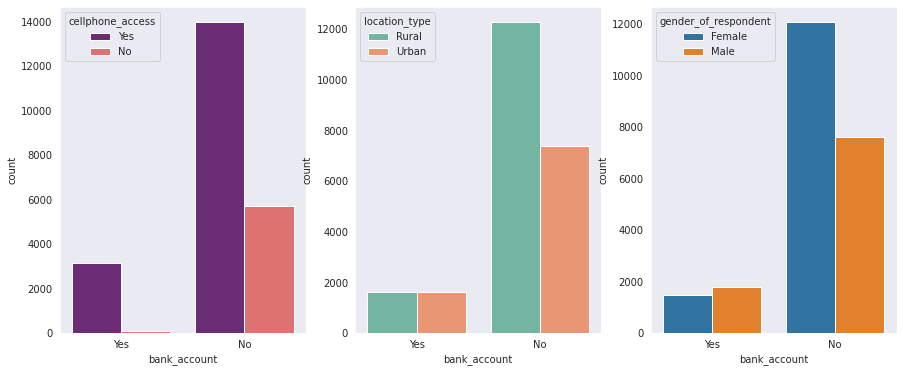

In [18]:
#Checking the number of people with bank accounts using different aspects eg cellphone access,location type and gender.
sns.set_style('dark')
f,axes=plt.subplots(1,3,figsize=(15,6),)
sns.countplot(x='bank_account',hue='cellphone_access',data=train,palette='magma',ax=axes[0])
sns.countplot(data=train,ax=axes[1],x='bank_account',hue='location_type',palette='Set2')
sns.countplot(data=train,x='bank_account',hue='gender_of_respondent',ax=axes[2])
plt.show()

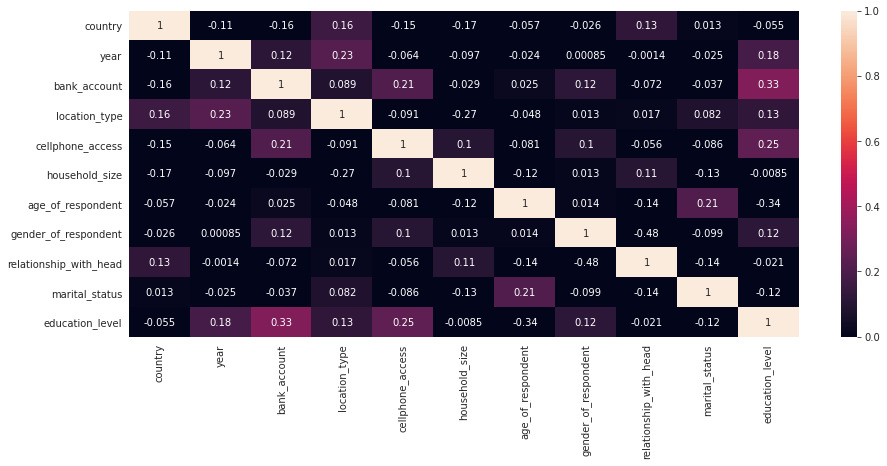

In [19]:
## finding correlation 
data_corr=train.copy()
data_corr.drop('uniqueid',inplace=True,axis=1)
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
data_corr['country']=ll.fit_transform(data_corr['country'])
data_corr['bank_account']=ll.fit_transform(data_corr['bank_account'])
data_corr['location_type']=ll.fit_transform(data_corr['location_type'])
data_corr['cellphone_access']=ll.fit_transform(data_corr['cellphone_access'])
data_corr['gender_of_respondent']=ll.fit_transform(data_corr['gender_of_respondent'])
data_corr['relationship_with_head'] = ll.fit_transform(data_corr['relationship_with_head'])
data_corr['marital_status']=ll.fit_transform(data_corr['marital_status'])
data_corr['education_level']=ll.fit_transform(data_corr['education_level'])
#data_corr['job_type']=ll.fit_transform(data_corr['job_type'])
### correlation
sns.set_style('dark')
f,axes=plt.subplots(1,1,figsize=(15,6))
sns.heatmap(data_corr.corr(),vmin=0,vmax=1,annot=True)

## **Inferential Statistics**

Conducting statistical test see if bank account is affected by the other features.

Example we have discovered that Education level has a positive correlation to havinga a bank account hence we conduct to test to see if its significant.

In [20]:
### testing if there is a significance difference between education level and having a bank account
## we use chi square test


alpha=0.05
from scipy.stats import chi2_contingency
contigency=pd.crosstab(train['bank_account'],train['education_level'])
contigency

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
bank_account,,,,,,
No,4119,20,11468,3147,562,335
Yes,161,11,1071,970,586,452


Is the p-value less than .05, we can conclude that the variables are not independent of each other and that there is a statistical relationship between the categorical variables.

A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
 
 A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.


A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

In [21]:
## the chi square test

# H0 : There is no relationship between the variables
# H1 : there is a relationship between the variable
stats,p,dof,expected=chi2_contingency(contigency)
print('pvalue: ',p)
print('stats: ',stats)
print('degree of freedom: ',dof)
print('expected value: ',expected)

print('-----------------------------------------------------------------------------------------------------------------------------------------------------')

if p< alpha:
  print('The variable are not independent of each other')
  print('There is  a statistical relationship  between education level and having a bank account')
else:
  print('independent and there is asignificant difference')

pvalue:  0.0
stats:  3507.4383934775387
degree of freedom:  5
expected value:  [[3.67244258e+03 2.65994673e+01 1.07590555e+04 3.53258087e+03
  9.85038337e+02 6.75283250e+02]
 [6.07557419e+02 4.40053270e+00 1.77994450e+03 5.84419134e+02
  1.62961663e+02 1.11716750e+02]]
-----------------------------------------------------------------------------------------------------------------------------------------------------
The variable are not independent of each other
There is  a statistical relationship  between education level and having a bank account


Small p-values (under 5%) usually indicate that a difference is significant (or “small enough”).

In [22]:
### statistical test to see if there is a significance difference between having a bank and having a cellphone
cellphone=pd.crosstab(train['bank_account'],train['cellphone_access'])
cellphone

cellphone_access,No,Yes
bank_account,,
No,5703,13948
Yes,93,3158


In [23]:
 stats,p,ddof,expected=chi2_contingency(cellphone)
 print('stats: ',stats)
 print('pvalue: ',p)
 print('degree of freedom: ',ddof)
 print('expected value: ',expected)

 print('--------------------------------------------------------------------------------------------------------')
if p<=alpha:
  print('There is a statistical relationship between the two variables')
else:
  print('no significant relationship')


stats:  1008.5647011692663
pvalue:  2.4695422178718705e-221
degree of freedom:  1
expected value:  [[ 4973.24233691 14677.75766309]
 [  822.75766309  2428.24233691]]
--------------------------------------------------------------------------------------------------------
There is a statistical relationship between the two variables


## **Feature  Engineering**

In [24]:
### encoding data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['country']=ll.fit_transform(train['country'])
train['bank_account']=ll.fit_transform(train['bank_account'])
train['location_type']=ll.fit_transform(train['location_type'])
train['cellphone_access']=ll.fit_transform(train['cellphone_access'])
train['gender_of_respondent']=ll.fit_transform(train['gender_of_respondent'])
train['relationship_with_head'] = ll.fit_transform(train['relationship_with_head'])
train['marital_status']=ll.fit_transform(train['marital_status'])
train['education_level']=ll.fit_transform(train['education_level'])
train['job_type']=ll.fit_transform(train['job_type'])

In [25]:
#### dropping highly correlated 
## corrlation matrix
corr_matrix=train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
train.drop(train[to_drop], axis=1)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,3,2018,uniqueid_2111,0,0,1,9,20,0,0,3,2,6
23519,3,2018,uniqueid_2113,0,0,1,4,48,0,1,0,0,7
23520,3,2018,uniqueid_2114,0,0,1,2,27,0,1,3,3,7
23521,3,2018,uniqueid_2115,0,0,1,5,27,0,4,4,2,7


In [26]:
## splitting the data into x and y
x=train.drop(['uniqueid','bank_account'],axis=1)
y=train['bank_account']
x.shape
y.shape

(22902,)

In [27]:
### test,train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.65,random_state=234)
x_train.shape
y_train.shape

(8015,)

In [28]:
## normalization of data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

## **Modelling**

In [ ]:
#hyperparameter tuning
param_grid={'n_estimators':[100,200,300,1000],
             'max_features':[2,3,4],
             'max_depth':[70,80,90,100],
             'min_samples_leaf':[3,4,5],
             'min_samples_split':[8,10,12],
             'bootstrap':[True]}
rf=RandomForestClassifier()
grid1=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,n_jobs=-1,verbose=2)
### fitting the grid
grid1.fit(x_train,y_train)
grid1.best_params_ 
grid1.best_estimators_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 41.0min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [29]:
## modelling  Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
forest=RandomForestClassifier(bootstrap=True,max_depth=100,max_features=2,min_samples_leaf=5,min_samples_split=12,n_estimators=200)
model1=forest.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score,f1_score
print('accuracy: ', accuracy_score(y_test,y_pred1)*100)
print('precision score: ',precision_score(y_test,y_pred1)*100)
print('f1 score: ',f1_score(y_test,y_pred1)*100 )

accuracy:  88.31866729361188
precision score:  72.81672816728168
f1 score:  40.506329113924046
